## Observations and Insights

## Dependencies and starter code

In [299]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_overview = mouse_study_merged.set_index("Mouse ID")
mouse_study_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [300]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
del mouse_study_merged["Age_months"]
del mouse_study_merged["Weight (g)"]
del mouse_study_merged["Timepoint"]
del mouse_study_merged["Metastatic Sites"]
del mouse_study_merged["Mouse ID"]
del mouse_study_merged["Sex"]

grouped_regimen = mouse_study_merged.groupby("Drug Regimen")


#mean
mean = grouped_regimen.mean()

#median
median = grouped_regimen.median()

#variance
variance = grouped_regimen.var()

#standard deviation
std = grouped_regimen.std()

#sem
sem = grouped_regimen.sem()

summary = pd.merge(mean, median, on="Drug Regimen")
summary2 = pd.merge(summary, variance, on="Drug Regimen")
summary3 = pd.merge(summary2, std, on="Drug Regimen")
summary_stats = pd.merge(summary3, sem, on="Drug Regimen")
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "Standard Error"]
summary_stats




,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

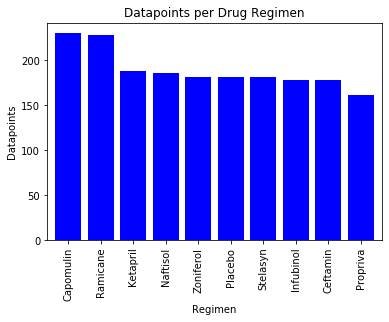

In [301]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_regimen_datapoints = mouse_study_merged["Drug Regimen"].value_counts()
bar_pandas = drug_regimen_datapoints.plot(kind="bar", title="Datapoints per Drug Regimen", color="blue", figsize=(6,4), width=0.8)
bar_pandas.set_ylabel("Datapoints")
bar_pandas.set_xlabel("Regimen")
drug_regimen_datapoints

Text(0, 0.5, 'Datapoints')

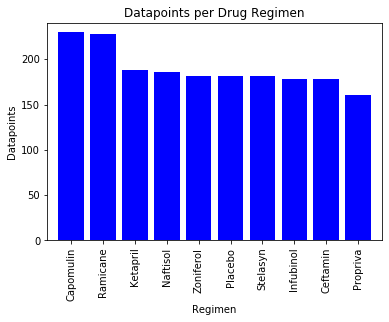

In [302]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen_datapoints = mouse_study_merged["Drug Regimen"].value_counts()
regimen = drug_regimen_datapoints.keys()

x_axis = np.arange(len(regimen))
plt.bar(x_axis, drug_regimen_datapoints, color="b", align="center" )
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_datapoints)+10)
plt.title("Datapoints per Drug Regimen")
plt.xlabel("Regimen")
plt.ylabel("Datapoints")

## Pie plots

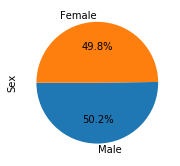

In [303]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distribution_sex = mouse_metadata["Sex"].value_counts()

ax1 = plt.subplot(121, aspect="equal")
distribution_sex.plot(kind="pie", y = "distribution_sex", ax=ax1, autopct="%1.1f%%", 
startangle=180, shadow=False, labels=mouse_metadata["Sex"], legend = False, fontsize=10)


Text(0, 0.5, 'Sex')

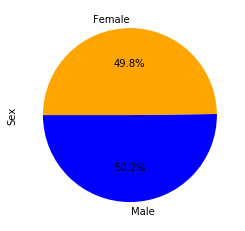

In [304]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = distribution_sex.keys()
distribution_sex
colors = ["blue", "orange"]

plt.pie(distribution_sex, labels=sex, colors=colors, autopct="%1.1f%%", shadow=False, startangle=180)
plt.ylabel("Sex")

## Quartiles, outliers and boxplots

In [305]:
#Final Tumor per Mouse across all the regimes
mouse_study_merged2 = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#Identifying the last timepoint per mouse
groupby = mouse_study_merged2.groupby(["Mouse ID"]).max()
final_timepoint_per_mouse = groupby.reset_index()
del final_timepoint_per_mouse["Drug Regimen"]
del final_timepoint_per_mouse["Sex"]
del final_timepoint_per_mouse["Age_months"]
del final_timepoint_per_mouse["Weight (g)"]
del final_timepoint_per_mouse["Tumor Volume (mm3)"]
del final_timepoint_per_mouse["Metastatic Sites"]

In [306]:
#Merge the dataframe that shows the final timepoint per mouse to the previous framework on Mouse ID and Datapoint, so you get the tumor volume at the last timepoint
final_tumor_per_mouse_merged=pd.merge(final_timepoint_per_mouse, mouse_study_merged2, on=["Mouse ID", "Timepoint"])



In [307]:
#Final Tumor per Mouse across the four most promising regimes
#Capomulin
capomulin_final = final_tumor_per_mouse_merged.loc[final_tumor_per_mouse_merged["Drug Regimen"]=="Capomulin"]
capomulin_df =capomulin_final["Tumor Volume (mm3)"]
capo_df=pd.DataFrame(capomulin_df)

print("Final Tumor Volume per Mouse for Capomulin")
capo_df

Final Tumor Volume per Mouse for Capomulin


,Tumor Volume (mm3)
19,38.982878
24,38.939633
61,30.485985
64,37.074024
66,40.159220
81,47.685963
84,37.311846
86,38.125164
88,38.753265
109,41.483008


In [308]:
#Ramicane
ramicane_final = final_tumor_per_mouse_merged.loc[final_tumor_per_mouse_merged["Drug Regimen"]=="Ramicane"]
ramicane_df =ramicane_final["Tumor Volume (mm3)"]
rami_df=pd.DataFrame(ramicane_df)

print("Final Tumor Volume per Mouse for Ramicane")
rami_df

Final Tumor Volume per Mouse for Ramicane


,Tumor Volume (mm3)
6,38.407618
7,43.047543
10,38.810366
12,32.978522
33,38.342008
37,33.397653
45,37.311236
52,40.659006
70,29.128472
77,33.562402


In [309]:
#Infubinol
infubinol_final = final_tumor_per_mouse_merged.loc[final_tumor_per_mouse_merged["Drug Regimen"]=="Infubinol"]
infubinol_df =infubinol_final["Tumor Volume (mm3)"]
infu_df=pd.DataFrame(infubinol_df)

print("Final Tumor Volume per Mouse for Infubinol")
infu_df

Final Tumor Volume per Mouse for Infubinol


,Tumor Volume (mm3)
0,67.973419
1,65.525743
11,57.031862
13,66.083066
27,72.226731
31,36.321346
41,60.969711
50,62.435404
56,60.918767
79,67.289621


In [310]:
#Ceftamin
ceftamin_final = final_tumor_per_mouse_merged.loc[final_tumor_per_mouse_merged["Drug Regimen"]=="Ceftamin"]
ceftamin_df =ceftamin_final["Tumor Volume (mm3)"]
ceft_df=pd.DataFrame(ceftamin_df)

print("Final Tumor Volume per Mouse for Ceftamin")
ceft_df

Final Tumor Volume per Mouse for Ceftamin


,Tumor Volume (mm3)
3,62.999356
21,45.000000
22,56.057749
25,55.742829
58,48.722078
76,47.784682
89,61.849023
95,68.923185
107,67.748662
108,57.918381


In [311]:
#Calculate the Quartiles and the IQR for each of the most promising drugs

#Capomulin
capo_quartiles = capomulin_df.quantile([0.25,0.5,0.75])
capo_lowerq= capo_quartiles[0.25]
capo_median= capo_quartiles[0.5]
capo_upperq= capo_quartiles[0.75]
capo_iqr=capo_upperq-capo_lowerq


#Ramicane
rami_quartiles = ramicane_df.quantile([0.25,0.5,0.75])
rami_lowerq= rami_quartiles[0.25]
rami_median= rami_quartiles[0.5]
rami_upperq= rami_quartiles[0.75]
rami_iqr=rami_upperq-rami_lowerq



#Infubinol
infu_quartiles = infubinol_df.quantile([0.25,0.5,0.75])
infu_lowerq= infu_quartiles[0.25]
infu_median= infu_quartiles[0.5]
infu_upperq= infu_quartiles[0.75]
infu_iqr=infu_upperq-infu_lowerq



#Ceftamin
ceft_quartiles = ceftamin_df.quantile([0.25,0.5,0.75])
ceft_lowerq= ceft_quartiles[0.25]
ceft_median= ceft_quartiles[0.5]
ceft_upperq= ceft_quartiles[0.75]
ceft_iqr=ceft_upperq-ceft_lowerq

print("The lower quartile of the tumor volume for Capomulin is" + " " + str(capo_lowerq))
print("The median of the tumor volume for Capomulin is" + " " + str(capo_median))
print("The upper quartile of the tumor volume for Capomulin is" + " " + str(capo_upperq))
print("The IQR of the tumor volume for Capomulin is" + " " + str(capo_iqr))
print("-----------------------------------------------------------------")
print("The lower quartile of the tumor volume for Ramicane is" + " " + str(rami_lowerq))
print("The median of the tumor volume for Ramicane is" + " " + str(rami_median))
print("The upper quartile of the tumor volume for Ramicane is" + " " + str(rami_upperq))
print("The IQR of the tumor volume for Ramicane is" + " " + str(rami_iqr))
print("-----------------------------------------------------------------")
print("The lower quartile of the tumor volume for Infubinol is" + " " + str(infu_lowerq))
print("The median of the tumor volume for Infubinol is" + " " + str(infu_median))
print("The upper quartile of the tumor volume for Infubinol is" + " " + str(infu_upperq))
print("The IQR of the tumor volume for Infubinol is" + " " + str(infu_iqr))
print("-----------------------------------------------------------------")
print("The lower quartile of the tumor volume for Ceftamin is" + " " + str(ceft_lowerq))
print("The median of the tumor volume for Ceftamin is" + " " + str(ceft_median))
print("The upper quartile of the tumor volume for Ceftamin is" + " " + str(ceft_upperq))
print("The IQR of the tumor volume for Ceftamin is" + " " + str(ceft_iqr))

The lower quartile of the tumor volume for Capomulin is 32.37735684
The median of the tumor volume for Capomulin is 38.125164399999996
The upper quartile of the tumor volume for Capomulin is 40.1592203
The IQR of the tumor volume for Capomulin is 7.781863460000004
-----------------------------------------------------------------
The lower quartile of the tumor volume for Ramicane is 31.56046955
The median of the tumor volume for Ramicane is 36.56165229
The upper quartile of the tumor volume for Ramicane is 40.65900627
The IQR of the tumor volume for Ramicane is 9.098536719999998
-----------------------------------------------------------------
The lower quartile of the tumor volume for Infubinol is 54.04860769
The median of the tumor volume for Infubinol is 60.16518046
The upper quartile of the tumor volume for Infubinol is 65.52574285
The IQR of the tumor volume for Infubinol is 11.477135160000003
-----------------------------------------------------------------
The lower quartile of 

In [312]:
#Checking whether there are any outliers (quantitatively)

#Capomulin
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)
capo_outliers = capomulin_df.loc[(capomulin_df < capo_lower_bound) | (capomulin_df > capo_upper_bound)]

#Ramicane
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
rami_outliers = ramicane_df.loc[(ramicane_df < rami_lower_bound) | (ramicane_df > rami_upper_bound)]

#Infubinol
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
infu_outliers = infubinol_df.loc[(infubinol_df < infu_lower_bound) | (infubinol_df > infu_upper_bound)]

#Ceftamin
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
ceft_outliers = ceftamin_df.loc[(ceftamin_df < ceft_lower_bound) | (ceftamin_df > ceft_upper_bound)]

#by printing, checking if an outlier gets returned
    #print(capo_outliers)
    #print(rami_outliers)
    #print(infu_outliers)
    #print(ceft_outliers)

#accessing the outlier value in the Data Frame
infu_value=pd.DataFrame(infu_outliers)
infu_value = new.iloc[0,0]

       

print("Values below" + " " + str(capo_lower_bound) + " " + "could be potential outliers for Capomulin.")
print("Values above" + " " + str(capo_upper_bound) + " " + "could be potential outliers for Capomulin.")
print("-------------------------------------------------------------------------------------------------")
print("Values below" + " " + str(rami_lower_bound) + " " + "could be potential outliers for Ramicane.")
print("Values above" + " " + str(rami_upper_bound) + " " + "could be potential outliers for Ramicane.")
print("-------------------------------------------------------------------------------------------------")
print("Values below" + " " + str(infu_lower_bound) + " " + "could be potential outliers for Infubinol.")
print("Values above" + " " + str(infu_upper_bound) + " " + "could be potential outliers for Infubinol.")
print("An outlier for Infubinol has been found at" + " " + str(infu_value))
print("-------------------------------------------------------------------------------------------------")
print("Values below" + " " + str(ceft_lower_bound) + " " + "could be potential outliers for Ceftamin.")
print("Values above" + " " + str(ceft_upper_bound) + " " + "could be potential outliers for Ceftamin.")



Values below 20.70456164999999 could be potential outliers for Capomulin.
Values above 51.83201549 could be potential outliers for Capomulin.
-------------------------------------------------------------------------------------------------
Values below 17.912664470000003 could be potential outliers for Ramicane.
Values above 54.30681135 could be potential outliers for Ramicane.
-------------------------------------------------------------------------------------------------
Values below 36.83290494999999 could be potential outliers for Infubinol.
Values above 82.74144559000001 could be potential outliers for Infubinol.
An outlier for Infubinol has been found at 36.321345799999996
-------------------------------------------------------------------------------------------------
Values below 25.355449580000002 could be potential outliers for Ceftamin.
Values above 87.66645829999999 could be potential outliers for Ceftamin.


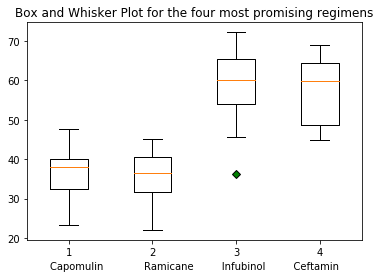

Outlier: 36.321345799999996


In [313]:
#Checking whether there are any outliers (with box and whisker plot)

green_diamond = dict(markerfacecolor="g", marker="D")

fig1, ax1 = plt.subplots()
ax1.set_title('Box and Whisker Plot for the four most promising regimens')
ax1.boxplot([capomulin_df, ramicane_df, infubinol_df, ceftamin_df], flierprops=green_diamond)

xlabel = "Capomulin             Ramicane         Infubinol         Ceftamin"
plt.xlabel(xlabel, fontdict=None, labelpad=None)
plt.show()
print("Outlier:" + " " + str(infu_value))

## Line and scatter plots

In [314]:
# Choose a Mouse that got treated with Capomulin
mouse_study_merged3 = pd.merge(mouse_metadata, study_results, on="Mouse ID")


capomulin_final = mouse_study_merged3.loc[mouse_study_merged3["Drug Regimen"]=="Capomulin"]
mouse_185 = capomulin_final.loc[capomulin_final["Mouse ID"]=="s185"]


In [315]:
#Get the list for the tumor volume of mouse s185 along the timepoints
mouse_185 = capomulin_final.loc[capomulin_final["Mouse ID"]=="s185"]
del mouse_185 ["Mouse ID"]
del mouse_185 ["Drug Regimen"]
del mouse_185 ["Sex"]
del mouse_185 ["Age_months"]
del mouse_185 ["Weight (g)"]
del mouse_185 ["Timepoint"]
del mouse_185 ["Metastatic Sites"]

tumor_volume_per_timepoint = mouse_185["Tumor Volume (mm3)"]

ser = pd.Series(tumor_volume_per_timepoint)
tumor_volume_array = ser.to_numpy()

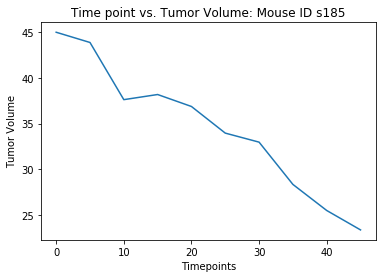

In [316]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = np.arange(0, 50, 5)

mouse_tumor = tumor_volume_array
mouse = plt.plot(x_axis, mouse_tumor)

plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume")
plt.title("Time point vs. Tumor Volume: Mouse ID s185")

plt.show()

In [338]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_study_merged4 = pd.merge(mouse_metadata, study_results, on="Mouse ID")
capomulin_mouse_weight = mouse_study_merged4.loc[mouse_study_merged4["Drug Regimen"]=="Capomulin"]

del capomulin_mouse_weight ["Mouse ID"]
del capomulin_mouse_weight ["Drug Regimen"]
del capomulin_mouse_weight ["Sex"]

del capomulin_mouse_weight ["Age_months"]
del capomulin_mouse_weight ["Timepoint"]
del capomulin_mouse_weight ["Metastatic Sites"]

tumor_volume_per_weight = capomulin_mouse_weight["Tumor Volume (mm3)"]
weight = capomulin_mouse_weight["Weight (g)"]
ser2 = pd.Series(tumor_volume_per_weight)
tumor_volume_per_weight_array = ser2.to_numpy()
tumor_volume_per_weight_array_mean = tumor_volume_per_weight_array.mean()

ser3 = pd.Series(weight)
weight_capomulin_array = ser3.to_numpy()


#Calculation of average tumor volume per Weight
w_15 = capomulin_mouse_weight.loc[capomulin_mouse_weight["Weight (g)"]==15]
tumor_w_15 = w_15["Tumor Volume (mm3)"]
tumor_w_15_mean = tumor_w_15.mean()

w_17 = capomulin_mouse_weight.loc[capomulin_mouse_weight["Weight (g)"]==17]
tumor_w_17 = w_17["Tumor Volume (mm3)"]
tumor_w_17_mean = tumor_w_17.mean()

w_19 = capomulin_mouse_weight.loc[capomulin_mouse_weight["Weight (g)"]==19]
tumor_w_19 = w_19["Tumor Volume (mm3)"]
tumor_w_19_mean = tumor_w_19.mean()

w_20 = capomulin_mouse_weight.loc[capomulin_mouse_weight["Weight (g)"]==20]
tumor_w_20 = w_20["Tumor Volume (mm3)"]
tumor_w_20_mean = tumor_w_20.mean()

w_21 = capomulin_mouse_weight.loc[capomulin_mouse_weight["Weight (g)"]==21]
tumor_w_21 = w_21["Tumor Volume (mm3)"]
tumor_w_21_mean = tumor_w_21.mean()

w_22 = capomulin_mouse_weight.loc[capomulin_mouse_weight["Weight (g)"]==22]
tumor_w_22 = w_22["Tumor Volume (mm3)"]
tumor_w_22_mean = tumor_w_22.mean()

w_23 = capomulin_mouse_weight.loc[capomulin_mouse_weight["Weight (g)"]==23]
tumor_w_23 = w_23["Tumor Volume (mm3)"]
tumor_w_23_mean = tumor_w_23.mean()

w_24 = capomulin_mouse_weight.loc[capomulin_mouse_weight["Weight (g)"]==24]
tumor_w_24 = w_24["Tumor Volume (mm3)"]
tumor_w_24_mean = tumor_w_24.mean()

w_25 = capomulin_mouse_weight.loc[capomulin_mouse_weight["Weight (g)"]==25]
tumor_w_25 = w_25["Tumor Volume (mm3)"]
tumor_w_25_mean = tumor_w_25.mean()

unique_weights=capomulin_mouse_weight["Weight (g)"].unique()
unique_weights

array([17, 15, 19, 20, 21, 22, 23, 25, 24])

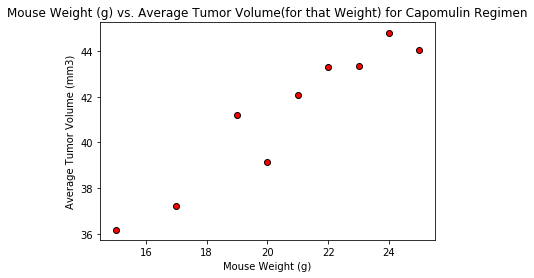

In [347]:


Weight = unique_weights #[15, 17, 19, 20, 21, 22, 23, 24, 25]
Tumor = [tumor_w_17_mean, tumor_w_15_mean, tumor_w_19_mean, tumor_w_20_mean, tumor_w_21_mean, tumor_w_22_mean, tumor_w_23_mean, tumor_w_25_mean, tumor_w_24_mean]

plt.title("Mouse Weight (g) vs. Average Tumor Volume(for that Weight) for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(Weight, Tumor, marker="o", facecolors="red", edgecolors="black")

In [348]:
# Calculate the correlation coefficient
correlation = st.pearsonr(Weight, Tumor)
correlation

print(f"The correlation between both Mouse Weight (g) and Average Tumor Volume (mm3) is {round(correlation[0],2)}")


The correlation between both Mouse Weight (g) and Average Tumor Volume (mm3) is 0.95


 the r-squared value is: 0.9034966277438609


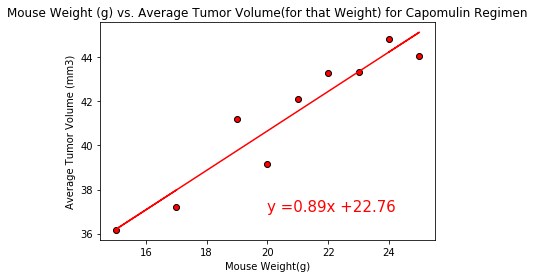

In [363]:
# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

x_values = unique_weights
y_values = Tumor

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,37),fontsize=15, color="red")
plt.title("Mouse Weight (g) vs. Average Tumor Volume(for that Weight) for Capomulin Regimen")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f" the r-squared value is: {rvalue**2}")

## Observations

1. From the study it seems that the data for the final tumor volume for Capomulin seems to show least variance with a 
   very low IQR of 7.781863460000004 of the data. This means that all the datapoints are relatively close to the 
   median of the final tumor volume for Capomulin. 
   
   
2. Capomulin and Ramicane seem to be the most promising drugs, with a median tumor volume at the end of the timepoint 
   of 38.125164399999996 and 36.56165229 respectively. However, for those two regimens most datapoints have been 
   collected (Capomulin: 230 & Ramicane: 228), which means that accuracy is higher. For the two other promising
   treatments (Infubinol and Ceftamin) only 178 each has been collected. It would be interesting increase their 
   datapoints to the ones of Capomulin and Ramicane and how their Median changes. 


3. Looking at the treatment of a (female) mouse with Capomulin it can be said that the the mouse weight and the   
   average tumor volume (mm3) per weight group are positively correlated. This makes sense thinking that a smaller 
   size in tumor makes the mouse lighter. 